In [1]:
#Imports needed
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1. Load in the data. The target column should be considered as whether a patient will develop heart disease or not.

In [2]:
heart_data= pd.read_csv("heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Separating all other columns from the target by dropping the target column and placing the other columns in a variable
X = heart_data.drop("target", axis=1)

# The y variable will store the target column
y = heart_data["target"]

In [4]:
#Checking how the data looks in the different variables
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Question 2. Explore the data. Notice all columns are numerical. Therefore separate the continuous from the discrete features.

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From .info() there are no nulls and it is noted that all columns are numerical

In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Getting the discrete numerical variables
#So discrete variables have values that are finite, so column represents a column in the data(X-> without our target column)
#So for each column we get all unique values in that column if the length is less than 20 there is high probabilty of the values in the column being finite
#SO for each column that satisfies the above condition we add it to the empty list and print it to show all discrete columns collected

discrete_variables=[]
for column in X.columns:
    if len(X[column].unique())<20:
        discrete_variables.append(column)
        
discrete_variables=pd.DataFrame(X,columns=discrete_variables)
discrete_variables.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [23]:
#Since all variables are numerical anything that is not discrete is continuous
#We creat an empty list to store continuous variables that are not in the discrete ones

continuous_variables=[]
for column in X.columns:
    if column not in discrete_variables:
        continuous_variables.append(column)
        
continuous_variables=pd.DataFrame(X,columns=continuous_variables)
continuous_variables.head()


0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

# Question 3.Identify any presence of outliers in the continuous features and resolve them using the IQR method.

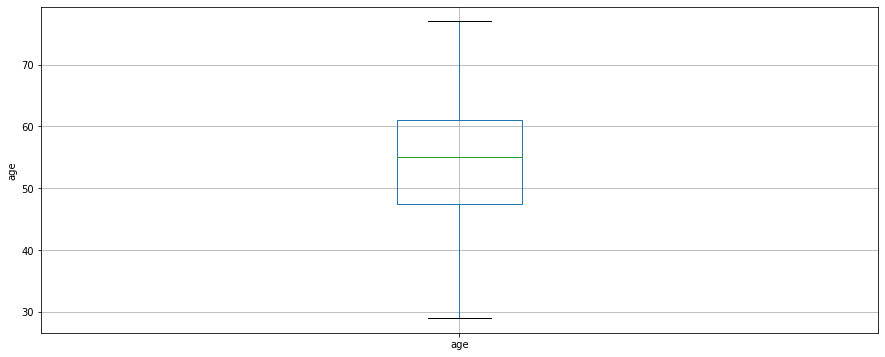

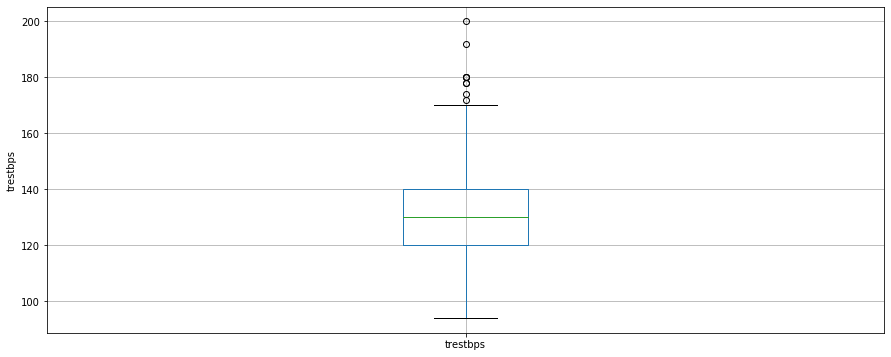

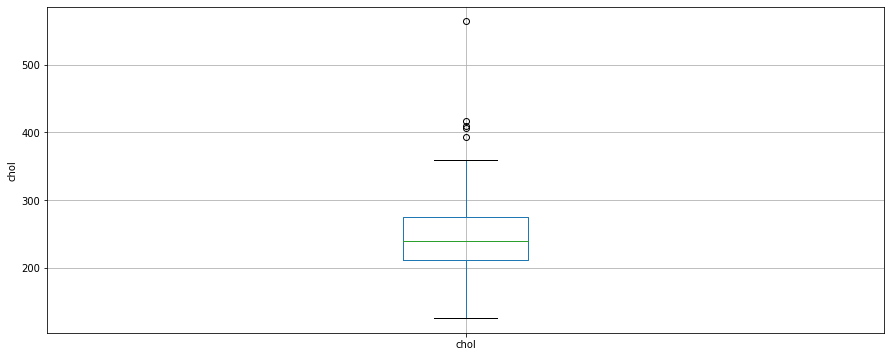

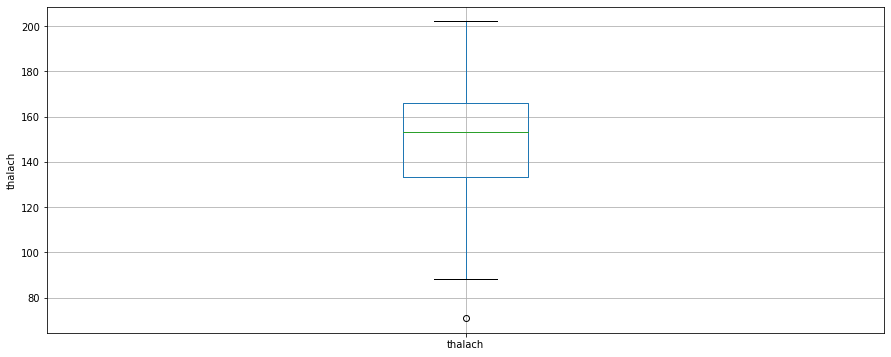

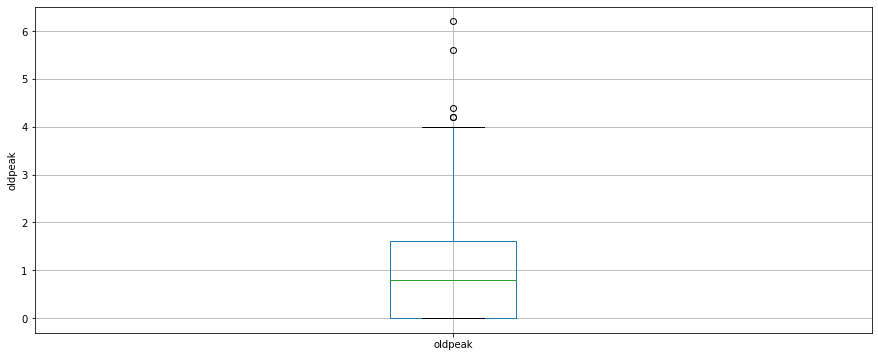

In [11]:
#Go through the list of continuous variables and plot a boxplot to view any outliers
for var in continuous_variables:
    plt.figure(figsize=(15,6))
    fig = X.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)

###### From the above visuals, the columns in the continuous variables that have outliers are:<br>
###### trestbps,chol,thalach and oldpeak

In [33]:
#To remove the outliers using Interquartile Range Method
#The function accepts a column and calculates the 1st Quartile,the median,3rd quartile
#It also calculates the difference between the 1st and 3rd quartile which is where most values would ordinarily lie
#A cut of is also calculate which is the difference of quartile 1 and quartile 3 multplied by a constant
#The lower range is then given by 1st quartile - cutoff while upper quartile range is given by 3rd quartile +cutoff
#We set the function to only return the lower quartile range and upper quartile range
def remove_outlier(column):
    q25 = column.quantile(0.25)
    q75 = column.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*2.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

#We then call the remove_outlier function and pass the columns we need to remove outliers for
#We then use loc to set the values of the column in the dataset to only what falls in between the lower quartile range and upper quartile range locking out any outlier values

lower, upper = remove_outlier(X['trestbps'])
X = X.loc[(X['trestbps'] > lower) & (X['trestbps'] < upper)]
    
lower, upper = remove_outlier(X['chol'])
X = X.loc[(X['chol'] > lower) & (X['chol'] < upper)]

lower, upper = remove_outlier(X['thalach'])
X = X.loc[(X['thalach'] > lower) & (X['thalach'] < upper)]

lower, upper = remove_outlier(X['oldpeak'])
X = X.loc[(X['oldpeak'] > lower) & (X['oldpeak'] < upper)]

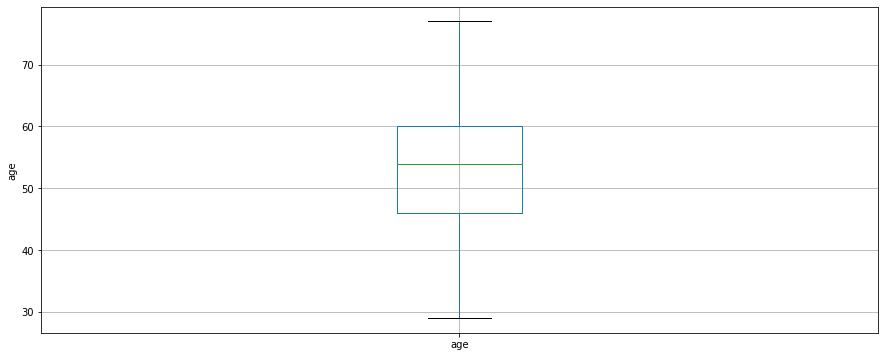

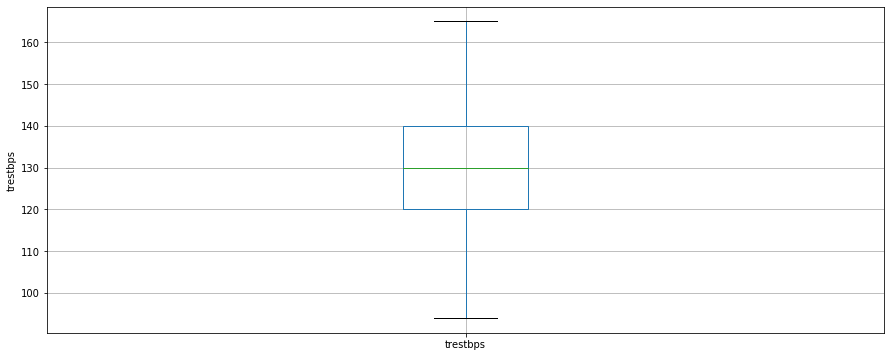

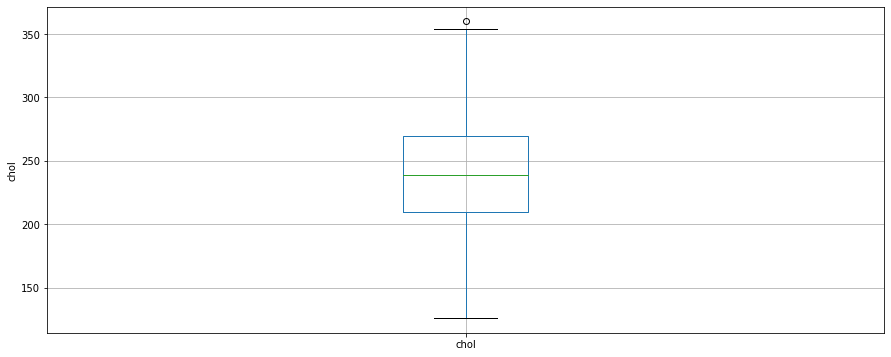

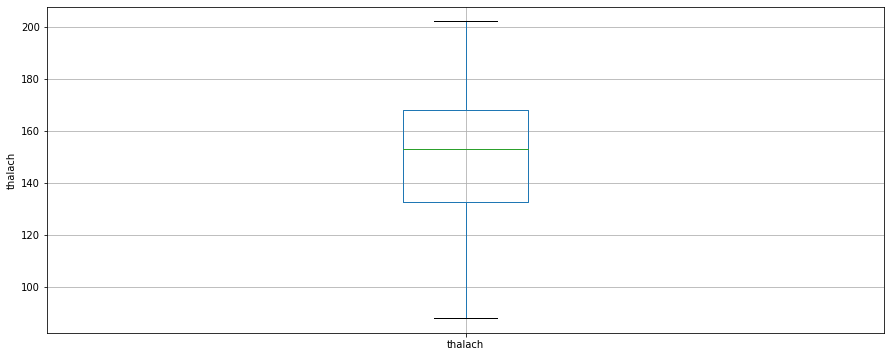

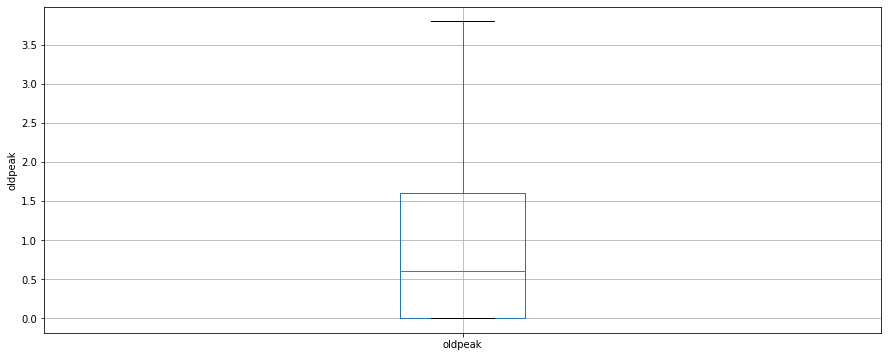

In [32]:
#To confirm that the outlier are gone we run this code again
for var in continuous_variables:
    plt.figure(figsize=(15,6))
    fig = X.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)

# Question 4. Binned the continuous column values apart from the column ‘oldpeak’.

# Question 5. Separate the features from the labels and use the most appropriate feature selection technique(s).

# Question 6. Slice the data and scale the features.

# Question 7. Identify the data if the data is balanced. If not, sample the data using the most appropriate method keeping the size of the data in mind.

# Question 8. Using at least 4 classification methods, identify the best machine learning model using their training and testing accuracy scores.

# Question 9. Hyper parameter tune the best model using grid search to identify the best performing model.

# Question 10. Redefine the model instance based on the grid search results, train it and evaluate it using:

#### a. A classification report.

#### b. A visual representation and well labelled confusion matrix.

#### c. AUC score. (Explain the score in a markdown cell.)

#### d. ROC curve.

# Question 11. Based on the results on the ROC curve, which threshold would be ideal given the nature of the data? (Explain in a markdown cell.)

# Question 12. Save the model as ‘classification_model’.